In [1263]:
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

In [1400]:
delta = pd.read_excel("/Users/united/Downloads/DL_B767-400 Detail_Sep1-6 data.xlsx")

In [1401]:
delta

,FlightDate,MarketingAirline,OperatingAirline,FlightNo,Origin,origincountry,Dest,destcountry,FirstSeatCount,BusSeatCount,...,CancelledFlag,CxlTimeStamp,schturnorigin,actturnorigin,schturndest,actturndest,schbufforigin,actbufforigin,schbuffdest,actbuffdest
0,20180901,DL,DL,837,ATL,US,HNL,US,0,40,...,0,NaN,121,133.0,104.0,115.0,59.0,46.0,136.0,121.0
1,20180901,DL,DL,836,HNL,US,ATL,US,0,40,...,0,NaN,104,115.0,930.0,968.0,26.0,14.0,718.0,628.0
2,20180901,DL,DL,476,JFK,US,BCN,ES,0,40,...,0,NaN,295,310.0,125.0,144.0,119.0,124.0,75.0,56.0
3,20180901,DL,DL,475,VCE,IT,JFK,US,0,40,...,0,NaN,110,123.0,335.0,345.0,1295.0,1299.0,85.0,68.0
4,20180901,DL,DL,474,JFK,US,VCE,IT,0,40,...,0,NaN,447,429.0,110.0,119.0,588.0,588.0,35.0,33.0
5,20180901,DL,DL,471,LAX,US,JFK,US,0,40,...,0,NaN,60,84.0,678.0,685.0,25.0,13.0,57.0,42.0
6,20180901,DL,DL,424,JFK,US,LAX,US,0,40,...,0,NaN,468,469.0,60.0,84.0,95.0,113.0,50.0,26.0
7,20180901,DL,DL,412,JFK,US,NCE,FR,0,40,...,0,NaN,445,482.0,105.0,109.0,17.0,17.0,1335.0,1324.0
8,20180901,DL,DL,411,JFK,US,PRG,CZ,0,40,...,0,NaN,855,851.0,105.0,106.0,21.0,26.0,65.0,25.0
9,20180901,DL,DL,410,JFK,US,MAD,ES,0,40,...,0,NaN,405,402.0,105.0,111.0,125.0,132.0,1440.0,NaN


In [1402]:
delta.dtypes

FlightDate                      int64
MarketingAirline               object
OperatingAirline               object
FlightNo                        int64
Origin                         object
origincountry                  object
Dest                           object
destcountry                    object
FirstSeatCount                  int64
BusSeatCount                    int64
EcoSeatCount                    int64
GeneralAcft                     int64
GeneralAcftName                object
ActualTailNumber               object
StatMiles                       int64
DepartureDate_Local    datetime64[ns]
ArrivalDate_Local      datetime64[ns]
schedblocktime                  int64
out_                   datetime64[ns]
off_                   datetime64[ns]
on_                    datetime64[ns]
in_                    datetime64[ns]
TaxiOut                         int64
TaxiIn                        float64
AirTime                       float64
ActualBlockTime               float64
DepVariance 

<h1>Tail Number</h1>

In [1403]:
delta['ActualTailNumber'].unique()

array(['N837MH', 'N838MH', 'N826MH', 'N830MH', 'N834MH', 'N827MH',
       'N845MH', 'N828MH', 'N844MH', 'N831MH', 'N841MH', 'N833MH',
       'N835MH', 'N836MH', 'N843MH', 'N832MH', 'N839MH', 'N842MH',
       'N840MH', 'N825MH', 'N829MH'], dtype=object)

In [1404]:
delta[delta['ActualTailNumber']== "N833MH"]['ActualBlockTime'].fillna(0)

16     591.0
27     519.0
62     556.0
75     543.0
76     503.0
129    566.0
169    657.0
175    527.0
191      0.0
199    615.0
Name: ActualBlockTime, dtype: float64

In [1405]:
TailNumber = [] #Empty array

ActualBlockTime = []

for x in delta['ActualTailNumber'].unique():
    tailNumber = x
    x = delta[delta['ActualTailNumber']== x].fillna(0)
    actualBlockTime = sum(x['ActualBlockTime'])
    #print({0} and {1},(tailNumber, airTime))
    TailNumber.append(tailNumber)
    ActualBlockTime.append(actualBlockTime)


In [1406]:
data = {'TailNumber': TailNumber,
         'ActualBlockTime': ActualBlockTime}
df = pd.DataFrame.from_dict(data)

In [1407]:
def dynamic_bar_plot(keys, values, fig_size_x, fig_size_y, title, x_label, y_label, targetName):
    
    freq_series = pd.Series.from_array(values)

    # Plot the figure.
    plt.figure(figsize=(fig_size_x, fig_size_y))
    ax = freq_series.plot(kind='bar')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(keys)

    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

    plt.savefig(targetName)

In [1408]:
#Frequent Words plot
dynamic_bar_plot(df['TailNumber'],df['AirTime'], 12, 6, "Aircraft Total Flying Hours", "Tail Number", "Air Time", "FilghtAirTime.png")

KeyError: 'AirTime'

In [1409]:
delta[delta['ActualTailNumber']== "N826MH"]

,FlightDate,MarketingAirline,OperatingAirline,FlightNo,Origin,origincountry,Dest,destcountry,FirstSeatCount,BusSeatCount,...,CancelledFlag,CxlTimeStamp,schturnorigin,actturnorigin,schturndest,actturndest,schbufforigin,actbufforigin,schbuffdest,actbuffdest
3,20180901,DL,DL,475,VCE,IT,JFK,US,0,40,...,0,NaN,110,123.0,335.0,345.0,1295.0,1299.0,85.0,68.0
35,20180901,DL,DL,44,JFK,US,DUB,IE,0,40,...,0,NaN,335,345.0,105.0,112.0,41.0,26.0,NaN,NaN
44,20180902,DL,DL,412,JFK,US,NCE,FR,0,40,...,0,NaN,385,395.0,105.0,101.0,50.0,51.0,1335.0,1349.0
70,20180902,DL,DL,45,DUB,IE,JFK,US,0,40,...,0,NaN,105,112.0,385.0,395.0,NaN,NaN,55.0,67.0
81,20180903,DL,DL,411,JFK,US,PRG,CZ,0,40,...,0,NaN,395,471.0,105.0,106.0,635.0,609.0,15.0,6.0
84,20180903,DL,DL,212,NCE,FR,JFK,US,0,40,...,0,NaN,105,101.0,395.0,471.0,1335.0,1367.0,0.0,28.0
122,20180904,DL,DL,410,JFK,US,MAD,ES,0,40,...,0,NaN,178,154.0,105.0,101.0,125.0,120.0,1000.0,NaN
126,20180904,DL,DL,211,PRG,CZ,JFK,US,0,40,...,0,NaN,105,106.0,178.0,154.0,1085.0,1101.0,54.0,5.0
176,20180905,DL,DL,109,MAD,ES,ATL,US,0,40,...,0,NaN,105,101.0,476.0,301.0,250.0,270.0,83.0,73.0
181,20180905,DL,DL,84,ATL,US,CDG,FR,0,40,...,0,NaN,476,301.0,130.0,137.0,404.0,394.0,NaN,NaN


In [1410]:
delta['ActualBlockTime'] = delta['ActualBlockTime'].fillna(0)

<h1>Maximum Airtime for ActualTailNumber </h1>

In [1411]:
max_AirTime = delta[delta['AirTime'] == delta['AirTime'].max()]
max_AirTime[['FlightDate', 'Origin','Dest','AirTime','ActualTailNumber']]
max_AirTime.rename(index=str, columns={"Origin": "IATA_CODE"})

,FlightDate,MarketingAirline,OperatingAirline,FlightNo,IATA_CODE,origincountry,Dest,destcountry,FirstSeatCount,BusSeatCount,...,CancelledFlag,CxlTimeStamp,schturnorigin,actturnorigin,schturndest,actturndest,schbufforigin,actbufforigin,schbuffdest,actbuffdest
176,20180905,DL,DL,109,MAD,ES,ATL,US,0,40,...,0,NaN,105,101.0,476.0,301.0,250.0,270.0,83.0,73.0


<h1>Minimum Airtime for ActualTailNumber </h1>

In [1412]:
min_AirTime = delta[delta['AirTime'] == delta['AirTime'].min()]
min_AirTime[['FlightDate', 'Origin','Dest','AirTime','ActualTailNumber']]

,FlightDate,Origin,Dest,AirTime,ActualTailNumber
110,20180904,ATL,JFK,106.0,N831MH


In [1413]:
airports[airports['IATA_CODE'] =="ATL"]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
20,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694


In [1414]:
airports[airports['IATA_CODE'] =="LAX"]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
176,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807


<h1>Single Flight per Day</h1>

In [1415]:
df_20180901 = delta[delta['FlightDate']==20180901]
df_20180902 = delta[delta['FlightDate']==20180902]
df_20180903 = delta[delta['FlightDate']==20180903]
df_20180904 = delta[delta['FlightDate']==20180904]
df_20180905 = delta[delta['FlightDate']==20180905]
df_20180906 = delta[delta['FlightDate']==20180906]

In [1416]:
TailNumber = [] #Empty array
Count = []
ActualBlockTime = []

for x in df_20180901['ActualTailNumber'].unique():
    tailNumber = x
    x = df_20180901[df_20180901['ActualTailNumber']== x].fillna(0)
    count = len(x['ActualBlockTime'])

    TailNumber.append(tailNumber)
    Count.append(count)
    actualBlockTime = sum(x['ActualBlockTime'])
    ActualBlockTime.append(actualBlockTime)

sep_01 = {'TailNumber': TailNumber,
         'Count': Count,
         'ActualBlockTime': ActualBlockTime}
Sep_01 = pd.DataFrame.from_dict(sep_01)
Sep_01 = Sep_01.sort_values(by='TailNumber')


In [1417]:
TailNumber = [] #Empty array
Count = []
ActualBlockTime = []

for x in df_20180902['ActualTailNumber'].unique():
    tailNumber = x
    x = df_20180902[df_20180902['ActualTailNumber']== x].fillna(0)
    count = len(x['ActualBlockTime'])
    TailNumber.append(tailNumber)
    Count.append(count)
    actualBlockTime = sum(x['AirTime'])
    ActualBlockTime.append(actualBlockTime)

sep_02 = {'TailNumber': TailNumber,
         'Count': Count,
         'ActualBlockTime': ActualBlockTime}
Sep_02 = pd.DataFrame.from_dict(sep_02)
Sep_02 = Sep_02.sort_values(by='TailNumber')


In [1418]:
TailNumber = [] #Empty array
Count = []
ActualBlockTime = []

for x in df_20180903['ActualTailNumber'].unique():
    tailNumber = x
    x = df_20180903[df_20180903['ActualTailNumber']== x].fillna(0)
    count = len(x['ActualBlockTime'])
    TailNumber.append(tailNumber)
    Count.append(count)
    actualBlockTime = sum(x['ActualBlockTime'])
    ActualBlockTime.append(actualBlockTime)

sep_03 = {'TailNumber': TailNumber,
         'Count': Count,
         'ActualBlockTime': ActualBlockTime}
Sep_03 = pd.DataFrame.from_dict(sep_03)
Sep_03 = Sep_03.sort_values(by='TailNumber')



In [1419]:
TailNumber = [] #Empty array
Count = []
ActualBlockTime = []

for x in df_20180904['ActualTailNumber'].unique():
    tailNumber = x
    x = df_20180904[df_20180904['ActualTailNumber']== x].fillna(0)
    count = len(x['ActualBlockTime'])
    TailNumber.append(tailNumber)
    Count.append(count)
    actualBlockTime = sum(x['ActualBlockTime'])
    ActualBlockTime.append(actualBlockTime)

sep_04 = {'TailNumber': TailNumber,
         'Count': Count,
         'ActualBlockTime': ActualBlockTime}
Sep_04 = pd.DataFrame.from_dict(sep_04)
Sep_04 = Sep_04.sort_values(by='TailNumber')


In [1420]:
TailNumber = [] #Empty array
Count = []
ActualBlockTime = []

for x in df_20180905['ActualTailNumber'].unique():
    tailNumber = x
    x = df_20180905[df_20180905['ActualTailNumber']== x].fillna(0)
    count = len(x['ActualBlockTime'])
    TailNumber.append(tailNumber)
    Count.append(count)
    actualBlockTime = sum(x['ActualBlockTime'])
    ActualBlockTime.append(actualBlockTime)

sep_05 = {'TailNumber': TailNumber,
         'Count': Count,
         'ActualBlockTime': ActualBlockTime}
Sep_05 = pd.DataFrame.from_dict(sep_05)
Sep_05 = Sep_05.sort_values(by='TailNumber')



In [1421]:
TailNumber = [] #Empty array
Count = []
ActualBlockTime = []

for x in df_20180906['ActualTailNumber'].unique():
    tailNumber = x
    x = df_20180906[df_20180906['ActualTailNumber']== x].fillna(0)
    count = len(x['ActualBlockTime'])
    TailNumber.append(tailNumber)
    Count.append(count)
    actualBlockTime = sum(x['ActualBlockTime'])
    ActualBlockTime.append(actualBlockTime)

sep_06 = {'TailNumber': TailNumber,
         'Count': Count,
         'ActualBlockTime': ActualBlockTime}
Sep_06 = pd.DataFrame.from_dict(sep_06)
Sep_06 = Sep_06.sort_values(by='TailNumber')



In [1422]:
sep01_02 = pd.merge(Sep_01, Sep_02, how ='outer', on='TailNumber')
sep01_02 = sep01_02.rename(index=str, columns={"Count_x": "Sept 01", "Count_y":"Sept 02","ActualBlockTime_x":"ActualBlockTime_Sept01","ActualBlockTime_y":"ActualBlockTime_Sept02"})

sep03_04 = pd.merge(Sep_03, Sep_04, how ='outer', on='TailNumber')
sep03_04 = sep03_04.rename(index=str, columns={"Count_x": "Sept 03", "Count_y":"Sept 04","ActualBlockTime_x":"ActualBlockTime_Sept03","ActualBlockTime_y":"ActualBlockTime_Sept04"})

sep05_06 = pd.merge(Sep_05, Sep_06, how ='outer', on='TailNumber')
sep05_06 = sep05_06.rename(index=str, columns={"Count_x": "Sept 05", "Count_y":"Sept 06","ActualBlockTime_x":"ActualBlockTime_Sept05","ActualBlockTime_y":"ActualBlockTime_Sept06"})

AirTime_01_02 = sep01_02[['TailNumber','AirTime_Sept01','AirTime_Sept02']]
AirTime_01_02 = AirTime_01_02.rename(index=str, columns={"AirTime_Sept01": "Sept 01", "AirTime_Sept02":"Sept 02"})

AirTime_03_04 = sep03_04[['TailNumber','AirTime_Sept03','AirTime_Sept04']]
AirTime_03_04 = AirTime_03_04.rename(index=str, columns={"AirTime_Sept03": "Sept 03", "AirTime_Sept04":"Sept 04"})

AirTime_05_06 = sep05_06[['TailNumber','AirTime_Sept05','AirTime_Sept06']]
AirTime_05_06 = AirTime_05_06.rename(index=str, columns={"AirTime_Sept05": "Sept 05", "AirTime_Sept06":"Sept 06"})


In [1423]:
BlockTime_01_02 = sep01_02[['TailNumber','ActualBlockTime_Sept01','ActualBlockTime_Sept02']]
BlockTime_01_02 = BlockTime_01_02.rename(index=str, columns={"ActualBlockTime_Sept01": "Sept 01", "ActualBlockTime_Sept02":"Sept 02"})

BlockTime_03_04 = sep03_04[['TailNumber','ActualBlockTime_Sept03','ActualBlockTime_Sept04']]
BlockTime_03_04 = BlockTime_03_04.rename(index=str, columns={"ActualBlockTime_Sept03": "Sept 03", "ActualBlockTime_Sept04":"Sept 04"})

BlockTime_05_06 = sep05_06[['TailNumber','ActualBlockTime_Sept05','ActualBlockTime_Sept06']]
BlockTime_05_06 = BlockTime_05_06.rename(index=str, columns={"ActualBlockTime_Sept05": "Sept 05", "ActualBlockTime_Sept06":"Sept 06"})


In [1424]:
sep01_04 = pd.merge(sep01_02, sep03_04, how ='outer', on='TailNumber')
sep01_06 = pd.merge(sep01_04, sep05_06, how ='outer', on='TailNumber')

In [1425]:
BlockTime_01_04 = pd.merge(BlockTime_01_02, BlockTime_03_04, how ='outer', on='TailNumber')
BlockTime_01_06 = pd.merge(BlockTime_01_04, BlockTime_05_06, how ='outer', on='TailNumber')

In [1426]:
BlockTime_01_06 = BlockTime_01_06.fillna(0)

AirTime_01_06['Sept 01'] = AirTime_01_06['Sept 01']/60
AirTime_01_06['Sept 02'] = AirTime_01_06['Sept 02']/60
AirTime_01_06['Sept 03'] = AirTime_01_06['Sept 03']/60
AirTime_01_06['Sept 04'] = AirTime_01_06['Sept 04']/60
AirTime_01_06['Sept 05'] = AirTime_01_06['Sept 05']/60
AirTime_01_06['Sept 06'] = AirTime_01_06['Sept 06']/60

In [1427]:
BlockTime_01_06['Sept 01'] = round(BlockTime_01_06['Sept 01']*(100/1440),2)
BlockTime_01_06['Sept 02'] = round(BlockTime_01_06['Sept 02']*(100/1440),2)
BlockTime_01_06['Sept 03'] = round(BlockTime_01_06['Sept 03']*(100/1440),2)
BlockTime_01_06['Sept 04'] = round(BlockTime_01_06['Sept 04']*(100/1440),2)
BlockTime_01_06['Sept 05'] = round(BlockTime_01_06['Sept 05']*(100/1440),2)
BlockTime_01_06['Sept 06'] = round(BlockTime_01_06['Sept 06']*(100/1440),2)

In [1428]:
(300/1440)*100

20.833333333333336

In [1429]:
BlockTime_01_06

,TailNumber,Sept 01,Sept 02,Sept 03,Sept 04,Sept 05,Sept 06
0,N825MH,38.89,70.42,38.61,44.65,0.00,0.00
1,N826MH,65.83,57.92,68.75,68.40,88.26,73.68
2,N827MH,65.42,64.86,68.12,75.69,80.97,78.61
3,N828MH,65.28,71.67,76.04,79.03,68.82,28.54
4,N830MH,64.65,63.33,74.10,65.56,82.22,48.33
5,N831MH,71.04,63.26,69.31,71.81,67.50,72.64
6,N832MH,73.75,30.49,47.01,74.17,61.67,71.94
7,N833MH,77.08,37.50,72.64,39.31,82.22,42.71
8,N834MH,46.94,66.53,63.82,82.64,45.97,51.88
9,N835MH,81.46,73.40,66.67,35.76,47.01,78.89


In [ ]:
BlockTime_01_06['Sept 01'] = BlockTime_01_06['Sept 01']*(1440/100)
BlockTime_01_06['Sept 02'] = BlockTime_01_06['Sept 02']*(1440/100)
BlockTime_01_06['Sept 03'] = BlockTime_01_06['Sept 03']*(1440/100)
BlockTime_01_06['Sept 04'] = BlockTime_01_06['Sept 04']*(1440/100)
BlockTime_01_06['Sept 05'] = BlockTime_01_06['Sept 05']*(1440/100)
BlockTime_01_06['Sept 06'] = BlockTime_01_06['Sept 06']*(1440/100)

In [1430]:
BlockTime_01_06.to_csv("BlockTime_01_06.csv")

In [1324]:
sep01_06.to_csv("sep01_06.csv")
AirTime_01_06.to_csv("airtime.csv")

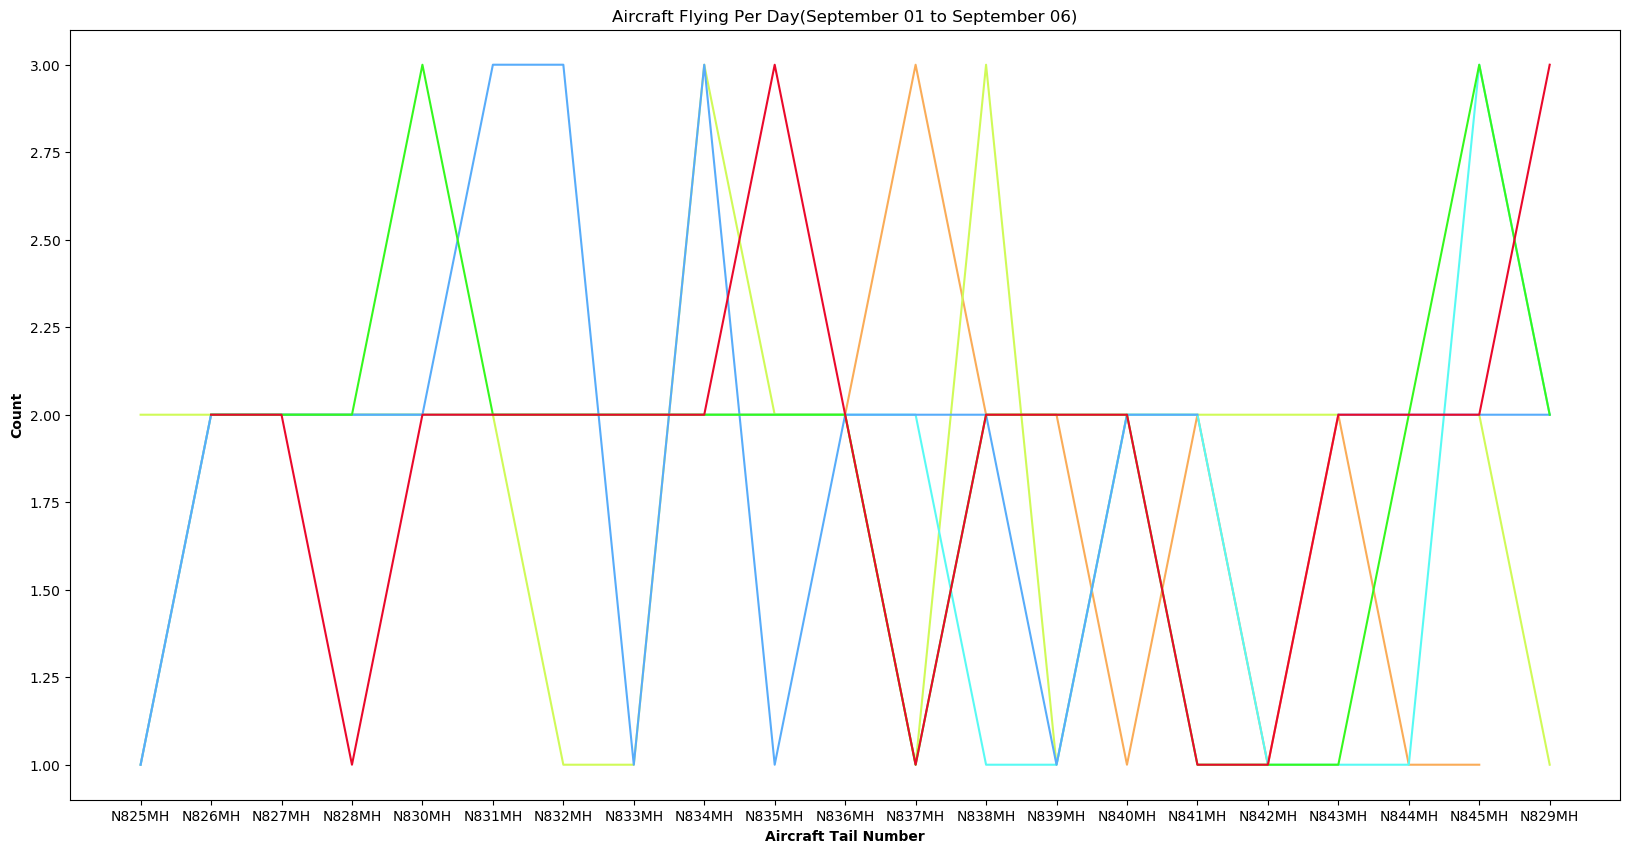

In [324]:
plt.figure(figsize=(20,10))
plt.plot(sep01_06['TailNumber'], sep01_06['Sept 01'], color='#FAAC58')
plt.plot(sep01_06['TailNumber'], sep01_06['Sept 02'], color='#D0FA58')
plt.plot(sep01_06['TailNumber'], sep01_06['Sept 03'], color='#58FAF4')
plt.plot(sep01_06['TailNumber'], sep01_06['Sept 04'], color='#58ACFA')
plt.plot(sep01_06['TailNumber'], sep01_06['Sept 05'], color='#35F81E')
plt.plot(sep01_06['TailNumber'], sep01_06['Sept 06'], color='#ea092b')
plt.xlabel('Aircraft Tail Number', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Aircraft Flying Per Day(September 01 to September 06)')
plt.show()

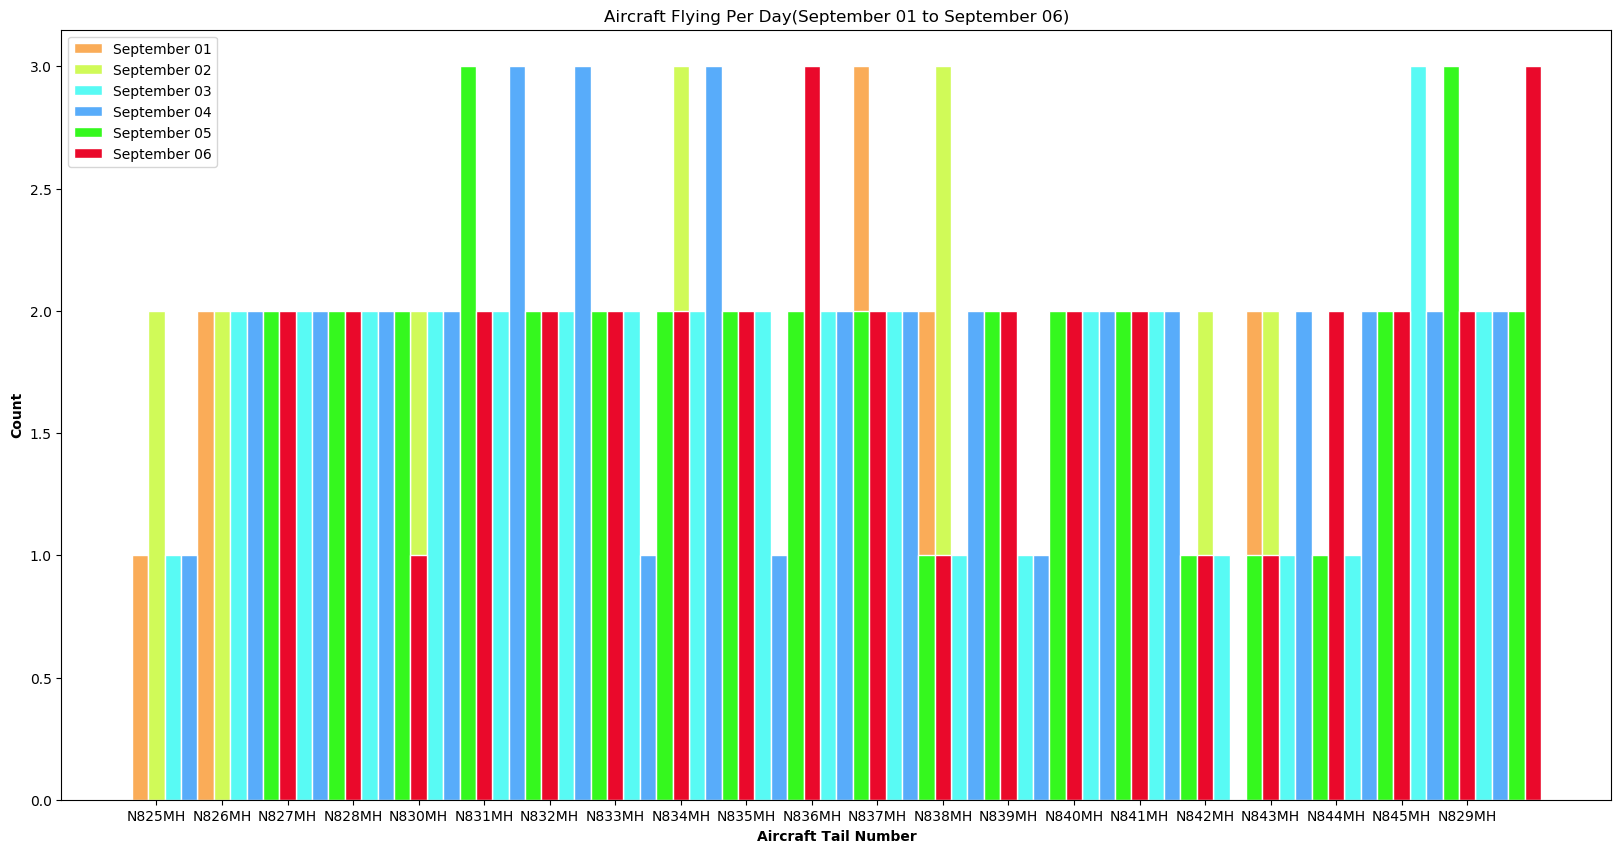

In [371]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = sep01_06['Sept 01']
bars2 = sep01_06['Sept 02']
bars3 = sep01_06['Sept 03']
bars4 = sep01_06['Sept 04']
bars5 = sep01_06['Sept 05']
bars6 = sep01_06['Sept 06']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Make the plot
plt.figure(figsize=(20,10))
plt.bar(r1, bars1, color='#FAAC58', width=barWidth, edgecolor='white', label='September 01')
plt.bar(r2, bars2, color='#D0FA58', width=barWidth, edgecolor='white', label='September 02')
plt.bar(r3, bars3, color='#58FAF4', width=barWidth, edgecolor='white', label='September 03')
plt.bar(r4, bars4, color='#58ACFA', width=barWidth, edgecolor='white', label='September 04')
plt.bar(r5, bars5, color='#35F81E', width=barWidth, edgecolor='white', label='September 05')
plt.bar(r6, bars6, color='#ea092b', width=barWidth, edgecolor='white', label='September 06')
 
# Add xticks on the middle of the group bars
plt.xlabel('Aircraft Tail Number', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Aircraft Flying Per Day(September 01 to September 06)')
plt.xticks([r3 + barWidth for r3 in range(len(bars3))], sep01_06['TailNumber'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [475]:
de['FlightDate'] = delta['FlightDate']
#de = de.astype('object')

In [477]:
delta['FlightDate']

0      20180901
1      20180901
2      20180901
3      20180901
4      20180901
5      20180901
6      20180901
7      20180901
8      20180901
9      20180901
10     20180901
11     20180901
12     20180901
13     20180901
14     20180901
15     20180901
16     20180901
17     20180901
18     20180901
19     20180901
20     20180901
21     20180901
22     20180901
23     20180901
24     20180901
25     20180901
26     20180901
27     20180901
28     20180901
29     20180901
         ...   
195    20180906
196    20180906
197    20180906
198    20180906
199    20180906
200    20180906
201    20180906
202    20180906
203    20180906
204    20180906
205    20180906
206    20180906
207    20180906
208    20180906
209    20180906
210    20180906
211    20180906
212    20180906
213    20180906
214    20180906
215    20180906
216    20180906
217    20180906
218    20180906
219    20180906
220    20180906
221    20180906
222    20180906
223    20180906
224    20180906
Name: FlightDate, Length

In [484]:
from datetime import datetime


In [488]:
delta['FlightDate'] =  pd.to_datetime(delta['FlightDate'], format='%Y%m%d')

In [915]:
delta.dtypes

FlightDate             datetime64[ns]
MarketingAirline               object
OperatingAirline               object
FlightNo                        int64
Origin                         object
origincountry                  object
Dest                           object
destcountry                    object
FirstSeatCount                  int64
BusSeatCount                    int64
EcoSeatCount                    int64
GeneralAcft                     int64
GeneralAcftName                object
ActualTailNumber               object
StatMiles                       int64
DepartureDate_Local    datetime64[ns]
ArrivalDate_Local      datetime64[ns]
schedblocktime                  int64
out_                   datetime64[ns]
off_                   datetime64[ns]
on_                            object
in_                            object
TaxiOut                         int64
TaxiIn                        float64
AirTime                       float64
ActualBlockTime               float64
DepVariance 

In [496]:
delta['AirTimeInHours'] = delta['AirTime']/60
delta = delta.fillna(0)

In [1243]:
delta['connections'] = delta['Origin'].map(str)+'-'+df['Dest']

In [1244]:
delta.to_csv("delta.csv")

In [498]:
delta.columns

Index(['FlightDate', 'MarketingAirline', 'OperatingAirline', 'FlightNo',
       'Origin', 'origincountry', 'Dest', 'destcountry', 'FirstSeatCount',
       'BusSeatCount', 'EcoSeatCount', 'GeneralAcft', 'GeneralAcftName',
       'ActualTailNumber', 'StatMiles', 'DepartureDate_Local',
       'ArrivalDate_Local', 'schedblocktime', 'out_', 'off_', 'on_', 'in_',
       'TaxiOut', 'TaxiIn', 'AirTime', 'ActualBlockTime', 'DepVariance',
       'ArrVariance', 'BlockVariance', 'DivertedFlag', 'CancelledFlag',
       'CxlTimeStamp', 'schturnorigin', 'actturnorigin', 'schturndest',
       'actturndest', 'schbufforigin', 'actbufforigin', 'schbuffdest',
       'actbuffdest', 'AirTimeInHours'],
      dtype='object')

In [1164]:
df = delta[['FlightDate','ActualTailNumber','FlightNo','Origin','Dest','DepartureDate_Local',
       'ArrivalDate_Local','out_','in_','AirTime','ActualBlockTime']]
df.dtypes

FlightDate             datetime64[ns]
ActualTailNumber               object
FlightNo                        int64
Origin                         object
Dest                           object
DepartureDate_Local    datetime64[ns]
ArrivalDate_Local      datetime64[ns]
out_                   datetime64[ns]
in_                            object
AirTime                       float64
ActualBlockTime               float64
dtype: object

In [1165]:
#filling null values in datetime64
df['in_'] = np.where(df['in_'] == 0, df['ArrivalDate_Local'], df['in_']).astype('datetime64[ns]')

df[df['ActualTailNumber'] == "N829MH"]

/Users/united/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FlightDate,ActualTailNumber,FlightNo,Origin,Dest,DepartureDate_Local,ArrivalDate_Local,out_,in_,AirTime,ActualBlockTime
67,2018-09-02,N829MH,62,ATL,FCO,2018-09-02 16:25:00,2018-09-03 08:00:00,2018-09-02 16:56:00,2018-09-03 08:25:00,547.0,569.0
88,2018-09-03,N829MH,192,ATL,VCE,2018-09-03 17:40:00,2018-09-04 09:10:00,2018-09-03 17:34:00,2018-09-04 09:08:00,547.0,574.0
103,2018-09-03,N829MH,63,FCO,ATL,2018-09-03 09:45:00,2018-09-03 15:00:00,2018-09-03 09:54:00,2018-09-03 14:26:00,607.0,632.0
128,2018-09-04,N829MH,193,VCE,ATL,2018-09-04 11:05:00,2018-09-04 15:50:00,2018-09-04 11:04:00,2018-09-04 15:26:00,591.0,622.0
138,2018-09-04,N829MH,108,ATL,MAD,2018-09-04 17:57:00,2018-09-05 08:35:00,2018-09-04 17:50:00,2018-09-05 08:34:00,495.0,524.0
160,2018-09-05,N829MH,412,JFK,NCE,2018-09-05 20:10:00,2018-09-06 10:20:00,2018-09-05 20:04:00,2018-09-06 10:05:00,438.0,481.0
167,2018-09-05,N829MH,210,MAD,JFK,2018-09-05 10:20:00,2018-09-05 12:45:00,2018-09-05 10:12:00,2018-09-05 12:00:00,432.0,468.0
187,2018-09-06,N829MH,41,JFK,LAX,2018-09-06 18:17:00,2018-09-06 21:25:00,2018-09-06 18:12:00,2018-09-06 23:14:00,306.0,482.0
208,2018-09-06,N829MH,212,NCE,JFK,2018-09-06 12:05:00,2018-09-06 15:05:00,2018-09-06 12:08:00,2018-09-06 14:40:00,488.0,512.0
223,2018-09-06,N829MH,1908,LAX,JFK,2018-09-06 22:55:00,2018-09-07 07:23:00,2018-09-07 00:30:00,2018-09-07 07:23:00,0.0,0.0


In [1166]:
df[df['ActualTailNumber'] == 'N837MH']

,FlightDate,ActualTailNumber,FlightNo,Origin,Dest,DepartureDate_Local,ArrivalDate_Local,out_,in_,AirTime,ActualBlockTime
0,2018-09-01,N837MH,837,ATL,HNL,2018-09-01 10:55:00,2018-09-01 14:41:00,2018-09-01 10:50:00,2018-09-01 14:30:00,545.0,580.0
1,2018-09-01,N837MH,836,HNL,ATL,2018-09-01 16:25:00,2018-09-02 07:16:00,2018-09-01 16:25:00,2018-09-02 06:49:00,484.0,504.0
19,2018-09-01,N837MH,150,LIM,ATL,2018-09-01 01:05:00,2018-09-01 08:54:00,2018-09-01 00:54:00,2018-09-01 08:37:00,373.0,403.0
65,2018-09-02,N837MH,84,ATL,CDG,2018-09-02 22:46:00,2018-09-03 13:10:00,2018-09-02 22:57:00,2018-09-03 13:18:00,477.0,501.0
96,2018-09-03,N837MH,116,ATL,STR,2018-09-03 17:52:00,2018-09-04 08:50:00,2018-09-03 21:27:00,2018-09-04 12:19:00,506.0,532.0
101,2018-09-03,N837MH,85,CDG,ATL,2018-09-03 15:20:00,2018-09-03 19:04:00,2018-09-03 15:19:00,2018-09-03 18:42:00,532.0,563.0
135,2018-09-04,N837MH,117,STR,ATL,2018-09-04 10:35:00,2018-09-04 14:47:00,2018-09-04 13:50:00,2018-09-04 17:46:00,569.0,596.0
142,2018-09-04,N837MH,84,ATL,CDG,2018-09-04 22:46:00,2018-09-05 13:10:00,2018-09-04 22:43:00,2018-09-05 13:11:00,475.0,508.0
180,2018-09-05,N837MH,85,CDG,ATL,2018-09-05 15:20:00,2018-09-05 19:04:00,2018-09-05 15:17:00,2018-09-05 18:41:00,531.0,564.0
196,2018-09-06,N837MH,108,ATL,MAD,2018-09-06 17:57:00,2018-09-07 08:35:00,2018-09-06 17:55:00,2018-09-07 08:23:00,473.0,508.0


In [1167]:
df.dtypes

FlightDate             datetime64[ns]
ActualTailNumber               object
FlightNo                        int64
Origin                         object
Dest                           object
DepartureDate_Local    datetime64[ns]
ArrivalDate_Local      datetime64[ns]
out_                   datetime64[ns]
in_                    datetime64[ns]
AirTime                       float64
ActualBlockTime               float64
dtype: object

In [1168]:
df = df.sort_values(by='out_',ascending=True)
df = df.reset_index(drop=True)
df

,FlightDate,ActualTailNumber,FlightNo,Origin,Dest,DepartureDate_Local,ArrivalDate_Local,out_,in_,AirTime,ActualBlockTime
0,2018-09-01,N837MH,150,LIM,ATL,2018-09-01 01:05:00,2018-09-01 08:54:00,2018-09-01 00:54:00,2018-09-01 08:37:00,373.0,403.0
1,2018-09-01,N834MH,424,JFK,LAX,2018-09-01 07:00:00,2018-09-01 10:05:00,2018-09-01 06:53:00,2018-09-01 09:36:00,315.0,343.0
2,2018-09-01,N832MH,83,CDG,ATL,2018-09-01 09:10:00,2018-09-01 12:55:00,2018-09-01 09:08:00,2018-09-01 12:21:00,535.0,553.0
3,2018-09-01,N835MH,63,FCO,ATL,2018-09-01 09:45:00,2018-09-01 15:00:00,2018-09-01 09:43:00,2018-09-01 14:14:00,604.0,631.0
4,2018-09-01,N827MH,210,MAD,JFK,2018-09-01 10:20:00,2018-09-01 12:45:00,2018-09-01 10:19:00,2018-09-01 12:01:00,440.0,462.0
5,2018-09-01,N839MH,91,DUS,ATL,2018-09-01 10:35:00,2018-09-01 14:30:00,2018-09-01 10:24:00,2018-09-01 14:04:00,558.0,580.0
6,2018-09-01,N841MH,117,STR,ATL,2018-09-01 10:35:00,2018-09-01 14:47:00,2018-09-01 10:28:00,2018-09-01 14:18:00,570.0,590.0
7,2018-09-01,N828MH,405,CDG,JFK,2018-09-01 10:20:00,2018-09-01 12:50:00,2018-09-01 10:38:00,2018-09-01 12:51:00,454.0,493.0
8,2018-09-01,N836MH,131,MUC,ATL,2018-09-01 10:25:00,2018-09-01 14:48:00,2018-09-01 10:41:00,2018-09-01 14:41:00,578.0,600.0
9,2018-09-01,N843MH,109,MAD,ATL,2018-09-01 11:00:00,2018-09-01 14:50:00,2018-09-01 10:47:00,2018-09-01 14:08:00,525.0,561.0


In [1169]:
df['connections'] = df['Origin'].map(str)+'-'+df['Dest']
df['AirTimeHours'] = df['AirTime']/60
df['ActualBlockTimeHours'] = df['ActualBlockTime']/60
N837MH = df[df['ActualTailNumber'] == 'N837MH']
N837MH = N837MH.reset_index(drop=True)

In [1170]:
in_2 = []

for index, row in N837MH.iterrows():
    in_2.append(row['in_'])
    in_2

in_2.pop(0)
in_2.append(0)
N837MH['in_2'] = in_2

In [1171]:
N837MH['in_2'] = np.where(N837MH['in_2'] == 0,N837MH['in_'],N837MH['in_2']).astype('datetime64[ns]')

In [1172]:
N837MH['in_'] = N837MH['in_'].astype("datetime64")

In [1173]:
N837MH.dtypes

FlightDate              datetime64[ns]
ActualTailNumber                object
FlightNo                         int64
Origin                          object
Dest                            object
DepartureDate_Local     datetime64[ns]
ArrivalDate_Local       datetime64[ns]
out_                    datetime64[ns]
in_                     datetime64[ns]
AirTime                        float64
ActualBlockTime                float64
connections                     object
AirTimeHours                   float64
ActualBlockTimeHours           float64
in_2                    datetime64[ns]
dtype: object

In [1174]:
N837MH['diff'] = N837MH['in_2'] - N837MH['in_']

def Rand(rangeLimit):
    res = [] 
    for j in range(rangeLimit): 
        res.append(random.randint(10,100))
    return res

Rand(len(N837MH))
N837MH['Latitude'] = Rand(len(N837MH))

N837MH

,FlightDate,ActualTailNumber,FlightNo,Origin,Dest,DepartureDate_Local,ArrivalDate_Local,out_,in_,AirTime,ActualBlockTime,connections,AirTimeHours,ActualBlockTimeHours,in_2,diff,Latitude
0,2018-09-01,N837MH,150,LIM,ATL,2018-09-01 01:05:00,2018-09-01 08:54:00,2018-09-01 00:54:00,2018-09-01 08:37:00,373.0,403.0,LIM-ATL,6.216667,6.716667,2018-09-01 14:30:00,0 days 05:53:00,31
1,2018-09-01,N837MH,837,ATL,HNL,2018-09-01 10:55:00,2018-09-01 14:41:00,2018-09-01 10:50:00,2018-09-01 14:30:00,545.0,580.0,ATL-HNL,9.083333,9.666667,2018-09-02 06:49:00,0 days 16:19:00,94
2,2018-09-01,N837MH,836,HNL,ATL,2018-09-01 16:25:00,2018-09-02 07:16:00,2018-09-01 16:25:00,2018-09-02 06:49:00,484.0,504.0,HNL-ATL,8.066667,8.400000,2018-09-03 13:18:00,1 days 06:29:00,38
3,2018-09-02,N837MH,84,ATL,CDG,2018-09-02 22:46:00,2018-09-03 13:10:00,2018-09-02 22:57:00,2018-09-03 13:18:00,477.0,501.0,ATL-CDG,7.950000,8.350000,2018-09-03 18:42:00,0 days 05:24:00,62
4,2018-09-03,N837MH,85,CDG,ATL,2018-09-03 15:20:00,2018-09-03 19:04:00,2018-09-03 15:19:00,2018-09-03 18:42:00,532.0,563.0,CDG-ATL,8.866667,9.383333,2018-09-04 12:19:00,0 days 17:37:00,47
5,2018-09-03,N837MH,116,ATL,STR,2018-09-03 17:52:00,2018-09-04 08:50:00,2018-09-03 21:27:00,2018-09-04 12:19:00,506.0,532.0,ATL-STR,8.433333,8.866667,2018-09-04 17:46:00,0 days 05:27:00,96
6,2018-09-04,N837MH,117,STR,ATL,2018-09-04 10:35:00,2018-09-04 14:47:00,2018-09-04 13:50:00,2018-09-04 17:46:00,569.0,596.0,STR-ATL,9.483333,9.933333,2018-09-05 13:11:00,0 days 19:25:00,37
7,2018-09-04,N837MH,84,ATL,CDG,2018-09-04 22:46:00,2018-09-05 13:10:00,2018-09-04 22:43:00,2018-09-05 13:11:00,475.0,508.0,ATL-CDG,7.916667,8.466667,2018-09-05 18:41:00,0 days 05:30:00,100
8,2018-09-05,N837MH,85,CDG,ATL,2018-09-05 15:20:00,2018-09-05 19:04:00,2018-09-05 15:17:00,2018-09-05 18:41:00,531.0,564.0,CDG-ATL,8.850000,9.400000,2018-09-07 08:23:00,1 days 13:42:00,97
9,2018-09-06,N837MH,108,ATL,MAD,2018-09-06 17:57:00,2018-09-07 08:35:00,2018-09-06 17:55:00,2018-09-07 08:23:00,473.0,508.0,ATL-MAD,7.883333,8.466667,2018-09-07 08:23:00,0 days 00:00:00,71


## Timezone extraction

In [1033]:
airports_timezone_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",names =['Airport_ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','TzDatabaseTimeZone','Type','Source'])

In [1230]:
airports_timezone_df.to_csv("airports.csv")

In [1231]:
airports_timezone_df

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzDatabaseTimeZone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


In [1035]:
airports_timezone_df_Origin = airports_timezone_df.rename(index=str, columns={"IATA":"Origin"})
airports_timezone_df_Dest = airports_timezone_df.rename(index=str, columns={"IATA":"Dest"})

# Merging df and airports data

In [1175]:
result = pd.merge(df, airports_timezone_df_Origin, on='Origin')
result = pd.merge(result, airports_timezone_df_Dest, on='Dest')
result = result.rename(index=str, columns={"Latitude_x":"Origin_Latitude","Longitude_x":"Origin_Longitude","Latitude_y":"Dest_Latitude","Longitude_y":"Dest_Longitude"})
result.dtypes

FlightDate              datetime64[ns]
ActualTailNumber                object
FlightNo                         int64
Origin                          object
Dest                            object
DepartureDate_Local     datetime64[ns]
ArrivalDate_Local       datetime64[ns]
out_                    datetime64[ns]
in_                     datetime64[ns]
AirTime                        float64
ActualBlockTime                float64
connections                     object
AirTimeHours                   float64
ActualBlockTimeHours           float64
Airport_ID_x                     int64
Name_x                          object
City_x                          object
Country_x                       object
ICAO_x                          object
Origin_Latitude                float64
Origin_Longitude               float64
Altitude_x                       int64
Timezone_x                      object
DST_x                           object
TzDatabaseTimeZone_x            object
Type_x                   

In [1180]:
#result2 = result[['FlightDate','ActualTailNumber','Origin','Dest','off_','in_','AirTime','ActualBlockTime','AirTimeHours','ActualBlockTimeHours','TzDatabaseTimeZone_x','TzDatabaseTimeZone_y']]
result2 = result

In [1181]:
result2.dtypes

FlightDate              datetime64[ns]
ActualTailNumber                object
FlightNo                         int64
Origin                          object
Dest                            object
DepartureDate_Local     datetime64[ns]
ArrivalDate_Local       datetime64[ns]
out_                    datetime64[ns]
in_                     datetime64[ns]
AirTime                        float64
ActualBlockTime                float64
connections                     object
AirTimeHours                   float64
ActualBlockTimeHours           float64
Airport_ID_x                     int64
Name_x                          object
City_x                          object
Country_x                       object
ICAO_x                          object
Origin_Latitude                float64
Origin_Longitude               float64
Altitude_x                       int64
Timezone_x                      object
DST_x                           object
TzDatabaseTimeZone_x            object
Type_x                   

## UTC convertion from corresponding TimZones

In [1199]:
import pytz
import datetime

origin_datetime_in_utc = []
dest_datetime_in_utc = []

for index,row in result2.iterrows():
    
    origin_local = pytz.timezone(row['TzDatabaseTimeZone_x'])
    dest_local = pytz.timezone(row['TzDatabaseTimeZone_y'])
    
    origin_datetime_with_tz = local_tz.localize(row['DepartureDate_Local'], is_dst=None)
    dest_datetime_with_tz = local_tz.localize(row['ArrivalDate_Local'], is_dst=None)  
    
    origin_datetime_with_utc = origin_datetime_with_tz.astimezone(pytz.utc)
    dest_datetime_with_utc = dest_datetime_with_tz.astimezone(pytz.utc)
        
    origin_utc_time = origin_datetime_with_utc.strftime('%Y-%m-%d %H:%M:%S')
    dest_utc_time = dest_datetime_with_utc.strftime('%Y-%m-%d %H:%M:%S')
    
    origin_datetime_in_utc.append(origin_utc_time)
    dest_datetime_in_utc.append(dest_utc_time)

In [1236]:
import pytz
import datetime

out_datetime_in_utc = []
in_datetime_in_utc = []

for index,row in result2.iterrows():
    
    out_local = pytz.timezone(row['TzDatabaseTimeZone_x'])
    in_local = pytz.timezone(row['TzDatabaseTimeZone_y'])
    
    out_datetime_with_tz = local_tz.localize(row['out_'], is_dst=None)
    in_datetime_with_tz = local_tz.localize(row['in_'], is_dst=None)  
    
    out_datetime_with_utc = out_datetime_with_tz.astimezone(pytz.utc)
    in_datetime_with_utc = in_datetime_with_tz.astimezone(pytz.utc)
        
    out_utc_time = out_datetime_with_utc.strftime('%Y-%m-%d %H:%M:%S')
    in_utc_time = in_datetime_with_utc.strftime('%Y-%m-%d %H:%M:%S')
    
    out_datetime_in_utc.append(out_utc_time)
    in_datetime_in_utc.append(in_utc_time)

In [1237]:
result2['out_Local_UTC'] = out_datetime_in_utc
result2['in_Local_UTC'] = in_datetime_in_utc

result2['out_Local_UTC'] = result2['out_Local_UTC'].astype('datetime64')
result2['in_Local_UTC'] = result2['in_Local_UTC'].astype('datetime64')
result2.dtypes

FlightDate                   datetime64[ns]
ActualTailNumber                     object
FlightNo                              int64
Origin                               object
Dest                                 object
DepartureDate_Local          datetime64[ns]
ArrivalDate_Local            datetime64[ns]
out_                         datetime64[ns]
in_                          datetime64[ns]
AirTime                             float64
ActualBlockTime                     float64
connections                          object
AirTimeHours                        float64
ActualBlockTimeHours                float64
Airport_ID_x                          int64
Name_x                               object
City_x                               object
Country_x                            object
ICAO_x                               object
Origin_Latitude                     float64
Origin_Longitude                    float64
Altitude_x                            int64
Timezone_x                      

In [1238]:
result2

,FlightDate,ActualTailNumber,FlightNo,Origin,Dest,DepartureDate_Local,ArrivalDate_Local,out_,in_,AirTime,...,Timezone_y,DST_y,TzDatabaseTimeZone_y,Type_y,Source_y,out_Local_UTC,in_Local_UTC,AirTimeDifference,Aircraft_idle_time,Aircraft_idle_time_hours
0,2018-09-01,N837MH,150,LIM,ATL,2018-09-01 01:05:00,2018-09-01 08:54:00,2018-09-01 00:54:00,2018-09-01 08:37:00,373.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-01 04:54:00,2018-09-01 12:37:00,07:43:00,1037.0,17:17:0
1,2018-09-02,N831MH,150,LIM,ATL,2018-09-02 01:05:00,2018-09-02 08:54:00,2018-09-02 00:58:00,2018-09-02 08:47:00,385.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-02 04:58:00,2018-09-02 12:47:00,07:49:00,1031.0,17:11:0
2,2018-09-03,N841MH,150,LIM,ATL,2018-09-03 01:05:00,2018-09-03 08:54:00,2018-09-03 01:03:00,2018-09-03 08:52:00,374.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-03 05:03:00,2018-09-03 12:52:00,07:49:00,1031.0,17:11:0
3,2018-09-04,N831MH,150,LIM,ATL,2018-09-04 01:05:00,2018-09-04 08:54:00,2018-09-04 01:34:00,2018-09-04 09:09:00,362.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-04 05:34:00,2018-09-04 13:09:00,07:35:00,1045.0,17:25:0
4,2018-09-05,N836MH,150,LIM,ATL,2018-09-05 01:05:00,2018-09-05 08:54:00,2018-09-05 00:54:00,2018-09-05 08:33:00,369.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-05 04:54:00,2018-09-05 12:33:00,07:39:00,1041.0,17:21:0
5,2018-09-06,N828MH,150,LIM,ATL,2018-09-06 01:05:00,2018-09-06 08:54:00,2018-09-06 01:04:00,2018-09-06 08:55:00,383.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-06 05:04:00,2018-09-06 12:55:00,07:51:00,1029.0,17:9:0
6,2018-09-01,N832MH,83,CDG,ATL,2018-09-01 09:10:00,2018-09-01 12:55:00,2018-09-01 09:08:00,2018-09-01 12:21:00,535.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-01 13:08:00,2018-09-01 16:21:00,03:13:00,887.0,14:47:0
7,2018-09-02,N842MH,85,CDG,ATL,2018-09-02 15:20:00,2018-09-02 19:04:00,2018-09-02 16:01:00,2018-09-02 19:17:00,523.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-02 20:01:00,2018-09-02 23:17:00,03:16:00,884.0,14:44:0
8,2018-09-03,N837MH,85,CDG,ATL,2018-09-03 15:20:00,2018-09-03 19:04:00,2018-09-03 15:19:00,2018-09-03 18:42:00,532.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-03 19:19:00,2018-09-03 22:42:00,03:23:00,877.0,14:37:0
9,2018-09-04,N841MH,85,CDG,ATL,2018-09-04 15:20:00,2018-09-04 19:04:00,2018-09-04 16:55:00,2018-09-04 20:01:00,525.0,...,-5,A,America/New_York,airport,OurAirports,2018-09-04 20:55:00,2018-09-05 00:01:00,03:06:00,894.0,14:54:0


In [1208]:
result2['AirTimeDifference'] = result2['in_Local_UTC']-result2['out_Local_UTC']
result2[['ActualBlockTime','ActualBlockTimeHours','AirTimeDifference']]

,ActualBlockTime,ActualBlockTimeHours,AirTimeDifference
0,403.0,6.716667,07:43:00
1,409.0,6.816667,07:49:00
2,409.0,6.816667,07:49:00
3,395.0,6.583333,07:35:00
4,399.0,6.650000,07:39:00
5,411.0,6.850000,07:51:00
6,553.0,9.216667,03:13:00
7,556.0,9.266667,03:16:00
8,563.0,9.383333,03:23:00
9,546.0,9.100000,03:06:00


In [1209]:
24*60

1440

In [1210]:
result2['Aircraft_idle_time'] = ((24*60) - result2['ActualBlockTime'])

# min to hour convertion

In [1211]:
def ConvertSectoDay(n):
    n = int(n)*60    
    hour = n // 3600
    n %= 3600
    minutes = n // 60
    n %= 60
    seconds = n

    result = str(hour)+":"+str(minutes)+":"+str(seconds)
    return result

In [1212]:
timeConv = []

for index,row in result2.iterrows():
    timeConv.append(ConvertSectoDay(row['Aircraft_idle_time']))
    
result2['Aircraft_idle_time_hours'] = timeConv


In [1213]:
result2.dtypes

FlightDate                   datetime64[ns]
ActualTailNumber                     object
FlightNo                              int64
Origin                               object
Dest                                 object
DepartureDate_Local          datetime64[ns]
ArrivalDate_Local            datetime64[ns]
out_                         datetime64[ns]
in_                          datetime64[ns]
AirTime                             float64
ActualBlockTime                     float64
connections                          object
AirTimeHours                        float64
ActualBlockTimeHours                float64
Airport_ID_x                          int64
Name_x                               object
City_x                               object
Country_x                            object
ICAO_x                               object
Origin_Latitude                     float64
Origin_Longitude                    float64
Altitude_x                            int64
Timezone_x                      

In [1229]:
result2[['Origin','Dest','out_','in_','TzDatabaseTimeZone_x','TzDatabaseTimeZone_y']]

,Origin,Dest,out_,in_,TzDatabaseTimeZone_x,TzDatabaseTimeZone_y
0,LIM,ATL,2018-09-01 00:54:00,2018-09-01 08:37:00,America/Lima,America/New_York
1,LIM,ATL,2018-09-02 00:58:00,2018-09-02 08:47:00,America/Lima,America/New_York
2,LIM,ATL,2018-09-03 01:03:00,2018-09-03 08:52:00,America/Lima,America/New_York
3,LIM,ATL,2018-09-04 01:34:00,2018-09-04 09:09:00,America/Lima,America/New_York
4,LIM,ATL,2018-09-05 00:54:00,2018-09-05 08:33:00,America/Lima,America/New_York
5,LIM,ATL,2018-09-06 01:04:00,2018-09-06 08:55:00,America/Lima,America/New_York
6,CDG,ATL,2018-09-01 09:08:00,2018-09-01 12:21:00,Europe/Paris,America/New_York
7,CDG,ATL,2018-09-02 16:01:00,2018-09-02 19:17:00,Europe/Paris,America/New_York
8,CDG,ATL,2018-09-03 15:19:00,2018-09-03 18:42:00,Europe/Paris,America/New_York
9,CDG,ATL,2018-09-04 16:55:00,2018-09-04 20:01:00,Europe/Paris,America/New_York


In [1219]:
result2[:115].to_csv('result.csv')

In [1220]:
result2[115:].to_csv('result2.csv')

In [1218]:
result.to_csv('resultFull.csv')

In [1225]:
airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [1235]:
airports_timezone_df[airports_timezone_df['IATA'] == "ATL"]

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzDatabaseTimeZone,Type,Source
3467,3682,Hartsfield Jackson Atlanta International Airport,Atlanta,United States,ATL,KATL,33.6367,-84.428101,1026,-5,A,America/New_York,airport,OurAirports


In [1240]:
result.dtypes

FlightDate                   datetime64[ns]
ActualTailNumber                     object
FlightNo                              int64
Origin                               object
Dest                                 object
DepartureDate_Local          datetime64[ns]
ArrivalDate_Local            datetime64[ns]
out_                         datetime64[ns]
in_                          datetime64[ns]
AirTime                             float64
ActualBlockTime                     float64
connections                          object
AirTimeHours                        float64
ActualBlockTimeHours                float64
Airport_ID_x                          int64
Name_x                               object
City_x                               object
Country_x                            object
ICAO_x                               object
Origin_Latitude                     float64
Origin_Longitude                    float64
Altitude_x                            int64
Timezone_x                      

In [1242]:
result[['out_','in_','Origin','TzDatabaseTimeZone_x','Dest','TzDatabaseTimeZone_y','out_Local_UTC','in_Local_UTC']]

,out_,in_,Origin,TzDatabaseTimeZone_x,Dest,TzDatabaseTimeZone_y,out_Local_UTC,in_Local_UTC
0,2018-09-01 00:54:00,2018-09-01 08:37:00,LIM,America/Lima,ATL,America/New_York,2018-09-01 04:54:00,2018-09-01 12:37:00
1,2018-09-02 00:58:00,2018-09-02 08:47:00,LIM,America/Lima,ATL,America/New_York,2018-09-02 04:58:00,2018-09-02 12:47:00
2,2018-09-03 01:03:00,2018-09-03 08:52:00,LIM,America/Lima,ATL,America/New_York,2018-09-03 05:03:00,2018-09-03 12:52:00
3,2018-09-04 01:34:00,2018-09-04 09:09:00,LIM,America/Lima,ATL,America/New_York,2018-09-04 05:34:00,2018-09-04 13:09:00
4,2018-09-05 00:54:00,2018-09-05 08:33:00,LIM,America/Lima,ATL,America/New_York,2018-09-05 04:54:00,2018-09-05 12:33:00
5,2018-09-06 01:04:00,2018-09-06 08:55:00,LIM,America/Lima,ATL,America/New_York,2018-09-06 05:04:00,2018-09-06 12:55:00
6,2018-09-01 09:08:00,2018-09-01 12:21:00,CDG,Europe/Paris,ATL,America/New_York,2018-09-01 13:08:00,2018-09-01 16:21:00
7,2018-09-02 16:01:00,2018-09-02 19:17:00,CDG,Europe/Paris,ATL,America/New_York,2018-09-02 20:01:00,2018-09-02 23:17:00
8,2018-09-03 15:19:00,2018-09-03 18:42:00,CDG,Europe/Paris,ATL,America/New_York,2018-09-03 19:19:00,2018-09-03 22:42:00
9,2018-09-04 16:55:00,2018-09-04 20:01:00,CDG,Europe/Paris,ATL,America/New_York,2018-09-04 20:55:00,2018-09-05 00:01:00


# Calculating avg time between Out, Off and On,In

In [1433]:
delta.dtypes

FlightDate                      int64
MarketingAirline               object
OperatingAirline               object
FlightNo                        int64
Origin                         object
origincountry                  object
Dest                           object
destcountry                    object
FirstSeatCount                  int64
BusSeatCount                    int64
EcoSeatCount                    int64
GeneralAcft                     int64
GeneralAcftName                object
ActualTailNumber               object
StatMiles                       int64
DepartureDate_Local    datetime64[ns]
ArrivalDate_Local      datetime64[ns]
schedblocktime                  int64
out_                   datetime64[ns]
off_                   datetime64[ns]
on_                    datetime64[ns]
in_                    datetime64[ns]
TaxiOut                         int64
TaxiIn                        float64
AirTime                       float64
ActualBlockTime               float64
DepVariance 

In [1449]:
calc = delta[['FlightDate','out_','off_','on_','in_','ActualTailNumber']]

In [1450]:
calc

,FlightDate,out_,off_,on_,in_,ActualTailNumber
0,20180901,2018-09-01 10:50:00,2018-09-01 11:21:00,2018-09-01 14:26:00,2018-09-01 14:30:00,N837MH
1,20180901,2018-09-01 16:25:00,2018-09-01 16:39:00,2018-09-02 06:43:00,2018-09-02 06:49:00,N837MH
2,20180901,2018-09-01 19:50:00,2018-09-01 20:28:00,2018-09-02 09:39:00,2018-09-02 09:46:00,N838MH
3,20180901,2018-09-01 13:06:00,2018-09-01 13:32:00,2018-09-01 16:09:00,2018-09-01 16:18:00,N826MH
4,20180901,2018-09-01 21:10:00,2018-09-01 21:30:00,2018-09-02 11:14:00,2018-09-02 11:18:00,N830MH
5,20180901,2018-09-01 11:00:00,2018-09-01 11:24:00,2018-09-01 19:11:00,2018-09-01 19:33:00,N834MH
6,20180901,2018-09-01 06:53:00,2018-09-01 07:10:00,2018-09-01 09:25:00,2018-09-01 09:36:00,N834MH
7,20180901,2018-09-01 20:03:00,2018-09-01 20:39:00,2018-09-02 09:58:00,2018-09-02 10:03:00,N827MH
8,20180901,2018-09-01 21:45:00,2018-09-01 22:02:00,2018-09-02 11:50:00,2018-09-02 12:02:00,N845MH
9,20180901,2018-09-01 19:33:00,2018-09-01 20:15:00,2018-09-02 08:52:00,2018-09-02 09:00:00,N828MH


In [1442]:
calc['out_off'] = calc['off_'] - calc['out_']

calc['in_on'] = calc['in_'] - calc['on_']

/Users/united/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/united/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1444]:
calc.fillna(0)

,FlightDate,out_,off_,on_,in_,out_off,in_on
0,20180901,2018-09-01 10:50:00,2018-09-01 11:21:00,2018-09-01 14:26:00,2018-09-01 14:30:00,00:31:00,00:04:00
1,20180901,2018-09-01 16:25:00,2018-09-01 16:39:00,2018-09-02 06:43:00,2018-09-02 06:49:00,00:14:00,00:06:00
2,20180901,2018-09-01 19:50:00,2018-09-01 20:28:00,2018-09-02 09:39:00,2018-09-02 09:46:00,00:38:00,00:07:00
3,20180901,2018-09-01 13:06:00,2018-09-01 13:32:00,2018-09-01 16:09:00,2018-09-01 16:18:00,00:26:00,00:09:00
4,20180901,2018-09-01 21:10:00,2018-09-01 21:30:00,2018-09-02 11:14:00,2018-09-02 11:18:00,00:20:00,00:04:00
5,20180901,2018-09-01 11:00:00,2018-09-01 11:24:00,2018-09-01 19:11:00,2018-09-01 19:33:00,00:24:00,00:22:00
6,20180901,2018-09-01 06:53:00,2018-09-01 07:10:00,2018-09-01 09:25:00,2018-09-01 09:36:00,00:17:00,00:11:00
7,20180901,2018-09-01 20:03:00,2018-09-01 20:39:00,2018-09-02 09:58:00,2018-09-02 10:03:00,00:36:00,00:05:00
8,20180901,2018-09-01 21:45:00,2018-09-01 22:02:00,2018-09-02 11:50:00,2018-09-02 12:02:00,00:17:00,00:12:00
9,20180901,2018-09-01 19:33:00,2018-09-01 20:15:00,2018-09-02 08:52:00,2018-09-02 09:00:00,00:42:00,00:08:00


In [1448]:
calc.describe()

,FlightDate,out_off,in_on
count,2.250000e+02,225,223
mean,2.018090e+07,0 days 00:23:47.466666,0 days 00:09:26.905829
std,1.703463e+00,0 days 00:17:27.311728,0 days 00:07:09.528156
min,2.018090e+07,0 days 00:09:00,0 days 00:02:00
25%,2.018090e+07,0 days 00:15:00,0 days 00:05:00
50%,2.018090e+07,0 days 00:19:00,0 days 00:08:00
75%,2.018090e+07,0 days 00:26:00,0 days 00:11:00
max,2.018091e+07,0 days 02:43:00,0 days 01:14:00


In [1451]:
df4 = delta[['FlightDate','out_','in_','ActualTailNumber']]

In [1457]:
df4 = df4.rename(index=str, columns={'out_':'start','in_':'end'})

In [1458]:
df4.to_csv("df4.csv")